<a href="https://colab.research.google.com/github/andrerizzo/Image_Recognition_CNN/blob/master/Convolutional_Neural_Networks_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks Deep Dive


<br>

### What are Convolutional Neural Networks (CNNs) ?

Convolutional Neural Networks (CNNs) are a type of deep neural network designed to process data with a grid-like structure, such as images and time series. They use convolutional layers to automatically extract relevant features from the input data, reducing the need for manual preprocessing.


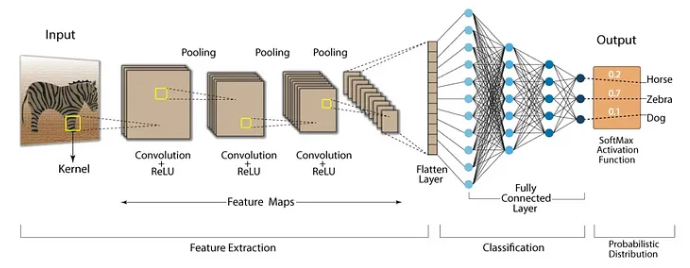
<figcaption>Source: https://medium.com/analytics-vidhya/convolution-operations-in-cnn-deep-learning-compter-vision-128906ece7d3</figcaption>

<br>

### What Are the Types of CNNs?  
There are several types of CNNs, each optimized for different applications. Some of the main ones include:

- **LeNet-5 (1998)** – One of the first CNNs, designed for handwritten digit recognition.  
- **AlexNet (2012)** – Popularized the use of deep networks with ReLU and dropout.  
- **VGGNet (2014)** – Uses deep convolutional layers with small filters (3x3).  
- **GoogLeNet/Inception (2014)** – Introduced Inception modules to capture different scales.  
- **ResNet (2015)** – Utilizes residual connections for extremely deep networks (50+ layers).  
- **YOLO (You Only Look Once - 2015)** – Optimized for real-time object detection.  
- **U-Net (2015)** – Used for medical image segmentation.
- **DenseNet (2017)** – Connects all convolutional layers to improve information flow.  
  

<br>

### CNNs Architecture    

1. **Convolutional Layers:**

- These layers apply convolutional operations to the input. But what is convolution ? It involves sliding a filter (or kernel) over the input data to extract features like edges, corners, or textures.    
- The output of this operation is called a feature map.  
- Convolution is the heart of the CNN, allowing that the network detects patterns in different image regions, making then ideal for image recognition.







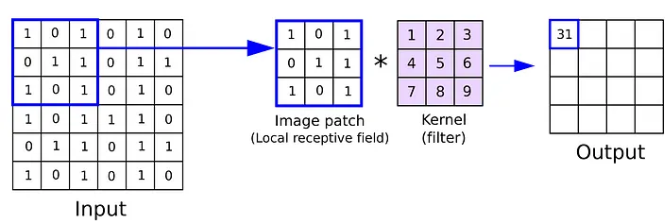
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

  
  - Key Parameters of convolutional layers:
    - *Kernel size:* Dimensions of the filter (e.g., 3x3 or 5x5).  
    - *Stride:* Stride determines how the filter convolves over the input matrix, i.e. how many pixels shift. When you set the stride to 1, the filter moves across one pixel at a time, and when you set the stride to 2, the filter moves across two pixels at a time. The smaller the stride value, the smaller the output, and vice versa (Kalita 2025).  
    - *Padding:* is the addition of extra pixel rows/columns around the borders of an input image. With padding, it is possible to mantain the image siza even after convolution.  

<br>

2. **Activation Function:**  

  Activation functions introduce non-linearity into CNNs, enabling them to learn complex patterns beyond simple linear transformations. Key roles include:

  - *Feature Extraction* – Helps CNNs detect hierarchical patterns from edges to objects.  
  - *Gradient Flow Control* – Prevents vanishing gradients (e.g., ReLU, Leaky ReLU).  
  - *Efficient Learning*  – Regulates information flow, improves computational efficiency, and reduces overfitting.


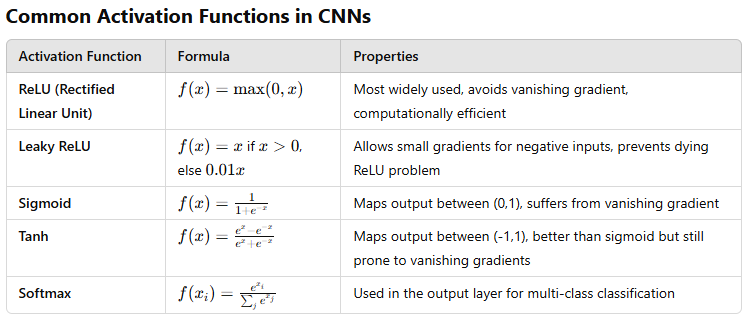

- **Choosing the Right Activation Function**  

  - **Hidden layers:**
    - *ReLU* (or its variants like Leaky ReLU) is usually the best choice due to efficiency and strong gradient flow.  
  - **Output layer:**   
    - *Sigmoid* for binary classification.  
    - *Softmax* for multi-class classification.  
    - *Linear* (no activation) for regression tasks.

<br>

3. **Pooling Layers:**  

  These layers reduce the spatial dimensions of the feature maps (e.g., height and width) while retaining important information.  

  Types:  
  Max pooling: Takes the maximum value in a pooling window (e.g., 2x2).  
  Average pooling: Takes the average value in a pooling window.  

  Benefits:  
  Reduces computational cost, controls overfitting, and retains essential features.  


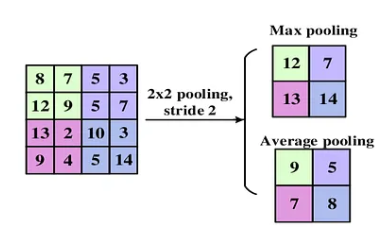
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

<br>

4. **Fully Connected Layers (Dense Layers):**  

  After feature extraction, the output is flattened and passed through one or more fully connected layers to make final predictions.  
  This layer combines features learned by the convolutional layers for classification or regression tasks.  
  
  How do they work ?  
  - **Flattening:** The outputs from convolutional and pooling layers are converted into a one-dimensional vector.  
  - **Fully Connected Neurons:** Each neuron is connected to every neuron in the previous layer, forming a dense network.  
  - **Probability Calculation:** Uses activation functions (such as Softmax or Sigmoid) to determine the final class of the image.  


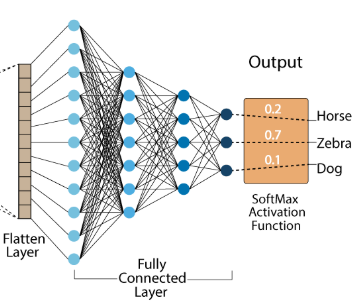
<figcaption>Source: https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/</figcaption>

<br>

5. **Dropout**

  Regularization technique to prevent overfitting by randomly setting a fraction of the layer’s neurons to zero during training.

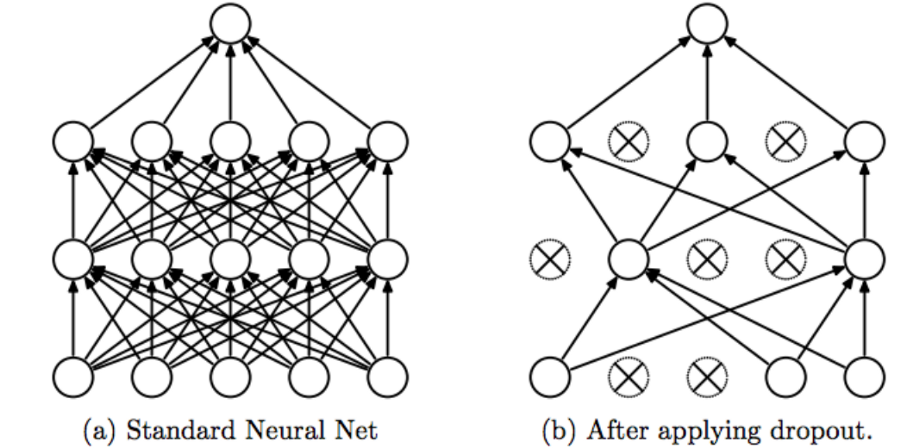  
<figcaption>Source: https://colab.research.google.com/drive/1-PrZ4ogfd_-wyhEcwaO1E0MdkKDYsBbN?authuser=1#scrollTo=i3HbvhX-8dJ5</figcaption>  

<br>

---   


## Practical Problem

### Load required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, regularizers
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

from google.colab import files

import tarfile

### Download dataset CIFAR-100 from University of Toronto

In [2]:
!wget 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'

--2025-02-14 23:09:05--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz.1’

cifar-100-python.ta 100%[===================>] 161.17M  14.4MB/s    in 13s     

2025-02-14 23:09:19 (12.5 MB/s) - ‘cifar-100-python.tar.gz.1’ saved [169001437/169001437]



### Extract *tar.gz* files

In [3]:
# Path to the .tar.gz file
tar_file_path = "/content/cifar-100-python.tar.gz"

# Extract to a specific folder
extract_folder = "/content"

# Open the tar file
with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(path=extract_folder)  # Extract all contents
    print("Extraction complete!")

Extraction complete!


### Read data from Pickle format

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = unpickle("/content/cifar-100-python/train")
test_data = unpickle("/content/cifar-100-python/test")

### Separate train images, train labels, test images, test labels

In [5]:
X_train = train_data[b'data']
y_train = train_data[b'fine_labels']
X_test = test_data[b'data']
y_test = test_data[b'fine_labels']

### Data Analysis

#### Analyse dataset shape

In [6]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (50000, 3072)
X_test shape: (10000, 3072)


In [7]:
print('y_train length: ', len(y_train))
print('y_test length: ', len(y_test))

y_train length:  50000
y_test length:  10000


#### Analyse data structures

In [8]:
print('X_train:', type(X_train))
print('y_train:', type(y_train))
print('X_test:', type(X_test))
print('y_test:', type(y_test))

X_train: <class 'numpy.ndarray'>
y_train: <class 'list'>
X_test: <class 'numpy.ndarray'>
y_test: <class 'list'>


#### Analyse data types

In [9]:
print('X_train object type: ', X_train.dtype)
print('X_test object type: ', X_test.dtype)

X_train object type:  uint8
X_test object type:  uint8


In [10]:
def get_element_types(lst):
    return set(type(x) for x in lst)

print('y_train object type:', get_element_types(y_train))
print('y_test object type:', get_element_types(y_test))

y_train object type: {<class 'int'>}
y_test object type: {<class 'int'>}


#### Analyse if the training and test datasets are imbalanced

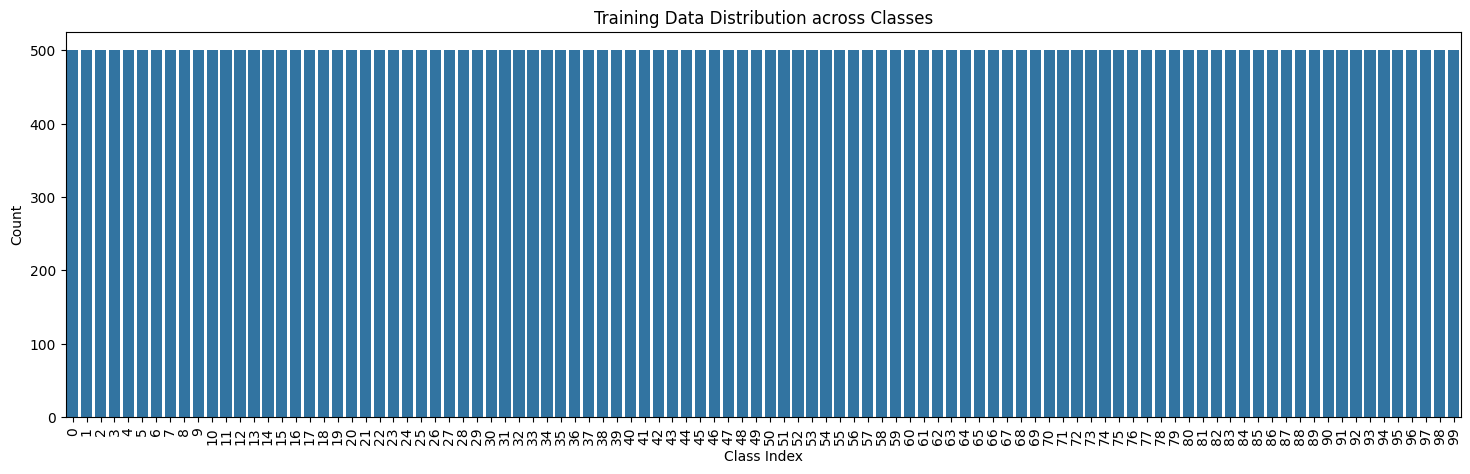

In [11]:
# Convert labels into a Pandas DataFrame
df_train = pd.DataFrame(y_train, columns=['label'])

# Count occurrences of each label
train_counts = df_train['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Training Data Distribution across Classes")
plt.show()

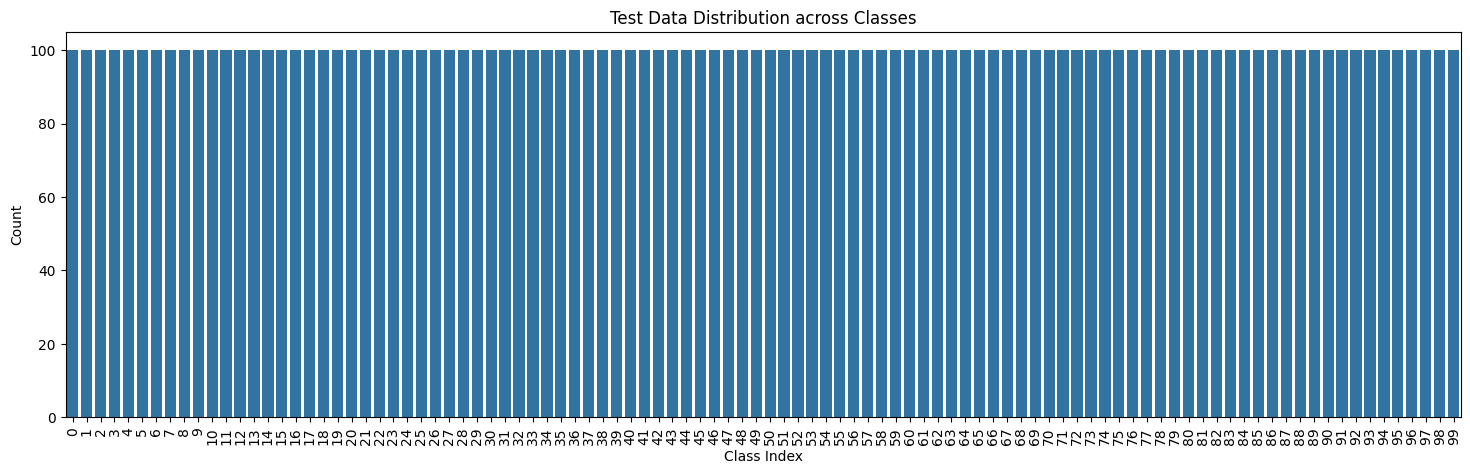

In [12]:
# Convert labels into a Pandas DataFrame
df_test = pd.DataFrame(y_test, columns=['label'])

# Count occurrences of each label
test_counts = df_test['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=test_counts.index, y=test_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Test Data Distribution across Classes")
plt.show()

#### **Dataset Analysis**  

- X_train
  - 50000 images distributed between 100 classes each one with 500 pictures.  
  - NumPy array data structure with integer data type.
  - **Actions:**   
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.  

- X_test
  - 10000 images distributed between 100 classes each one with 100 pictures.  
  - NumPy array data structure with integer data type.
  - **Actions:**  
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.

- y_train
  - 50000 labels distributed between 100 classes each one with 500 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

- y_test
  - 10000 labels distributed between 100 classes each one with 100 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

---  

<br>

### Pre-processing



#### Convert X_train and X_test from a *Numpy array* to a *4D tensor* and transform data type from *int* to *float*



In [13]:
X_train = X_train.reshape(50000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')
X_test = X_test.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')

#### Convert y_train and y_test from list to a NumPy array

In [14]:
y_train = np.array(y_train)
y_test = np.array(y_test)

- Keras pre-requisites  
  - Images must be stored in 4D tensors (Numpy array) and labels in 1D tensor (NumPy array also).
  - The input shape of the first convolutional layer must be in "channels-last" format (height, width, channels), rather than "channels-first" format (channels, height, width) used in frameworks like PyTorch.  


#### Analyse dataset after feature engineering

In [15]:
print('X_train data structure: ', type(X_train))
print('X_train data type: ', X_train.dtype)
print('X_train shape: ', X_train.shape)

print('\ny_train data structure: ', type(y_train))
print('y_train data type: ', y_train.dtype)
print('y_train shape: ', y_train.shape)

print('\nX_test data structure: ', type(X_test))
print('X_test data type: ', X_test.dtype)
print('X_test shape: ', X_test.shape)

print('\ny_test data structure: ', type(y_test))
print('y_test data type: ', y_test.dtype)
print('y_test shape: ', y_test.shape)


X_train data structure:  <class 'numpy.ndarray'>
X_train data type:  float32
X_train shape:  (50000, 32, 32, 3)

y_train data structure:  <class 'numpy.ndarray'>
y_train data type:  int64
y_train shape:  (50000,)

X_test data structure:  <class 'numpy.ndarray'>
X_test data type:  float32
X_test shape:  (10000, 32, 32, 3)

y_test data structure:  <class 'numpy.ndarray'>
y_test data type:  int64
y_test shape:  (10000,)


#### Analyse image maximun and minimun pixel intensity

In [16]:
X_train[0].max()

255.0

In [17]:
X_train[0].min()

1.0

It becomes evident that if the maximum intensity for each color is 255, dividing all color's values by 255 will transform the range from [0, 255] to [0, 1].  That is **Normalization**.



<br>

#### RGB color schema
To understand what will be done, let's delve into the RGB color scheme.  

The RGB (Red, Green, Blue) standard is an additive model used to represent colors by combining three primary colors: red, green, and blue. It is widely used in digital displays, such as monitors, televisions, and cameras, because these devices emit light to create colors.  

#### Color Representation in RGB  
In the RGB model, each color is represented by three values corresponding to the intensity of red, green, and blue.  
These values range from 0 to 255 for each color.
Example:  
* RGB(255, 0, 0) - Pure or 100% red  
* RGB(0, 255, 0) - Pure or 100% green  
* RGB(0, 0, 255) - Pure or 100% blue  

But it is possible to have also combination os two or more colors to form a third one.  
Example:  
* RGB(255, 255, 255): Pure or 100% white
* RGB(0, 0, 0): Black
* RGB(128, 128, 0): Half red and half green that is light yellow.  

#### Normalization

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Maximum after normalization

In [19]:
X_train[0].max()

1.0

#### Minimum after normalization

In [20]:
X_train[0].min()

0.003921569

<br>

#### Create train and validation sets  

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### View 30 images

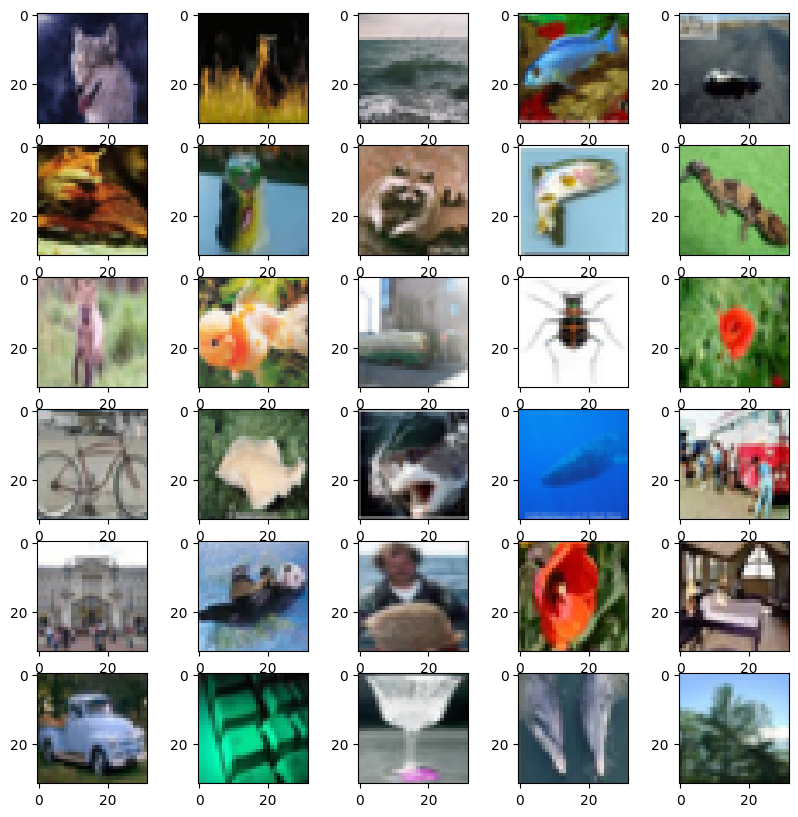

In [22]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(X_train[i])

As we can see images resolution are not good and some of them are almost unrecognizable.  

### View some individual images

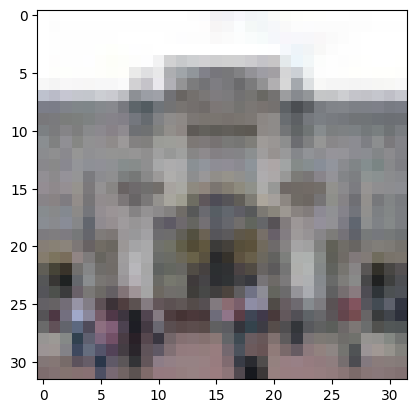

In [23]:
plt.imshow(X_train[20])
plt.show()

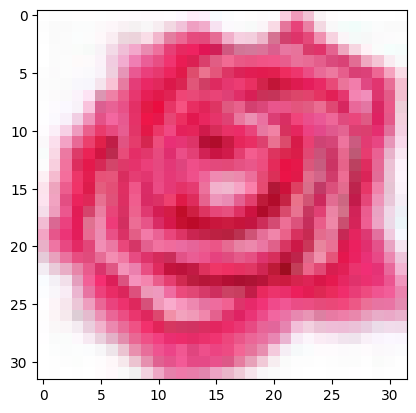

In [24]:
plt.imshow(X_train[1000])
plt.show()

<br>

---

### Modeling  

&nbsp; The objective here will be use different architectures (VGG16, ResNet) and validate wich one will have the best performance.    

#### Creating a CNN from scratch

##### Model creation

In [25]:
model = keras.Sequential([
  layers.Input(shape=(32, 32, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(units=64, activation='relu'),
  layers.Dense(units=100, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,580 (517.89 KB)

 Trainable params: 132,580 (517.89 KB)

 Non-trainable params: 0 (0.00 B)

##### Model compilation

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### Defining callbacks

In [27]:
training_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=3, min_lr = 0.0001),
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss',
                                    save_best_only=True)
    ]

##### Model training

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=training_callbacks)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0259 - loss: 4.4571 - val_accuracy: 0.0949 - val_loss: 3.9254 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1000 - loss: 3.9100 - val_accuracy: 0.1401 - val_loss: 3.6759 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1440 - loss: 3.6655 - val_accuracy: 0.1730 - val_loss: 3.5032 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1682 - loss: 3.5084 - val_accuracy: 0.2034 - val_loss: 3.3547 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1877 - loss: 3.4048 - val_accuracy: 0.2092 - val_loss: 3.3179 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2103 - loss: 3.3106 - val_accuracy: 0.2309 - val_loss: 3.2191 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2282 - 

##### Numerical analysis

In [29]:
best_epoch = min(range(len(history.history['val_loss'])), key=lambda i: history.history['val_loss'][i])
print(f"Best epoch: {best_epoch+1}")
print(f"Train Loss: {history.history['loss'][best_epoch]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][best_epoch]:.4f}")
print(f"Train Accuracy: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best epoch: 30
Train Loss: 2.6253
Validation Loss: 2.6612
Train Accuracy: 0.3550
Validation Accuracy: 0.3534


##### Graphical analysis

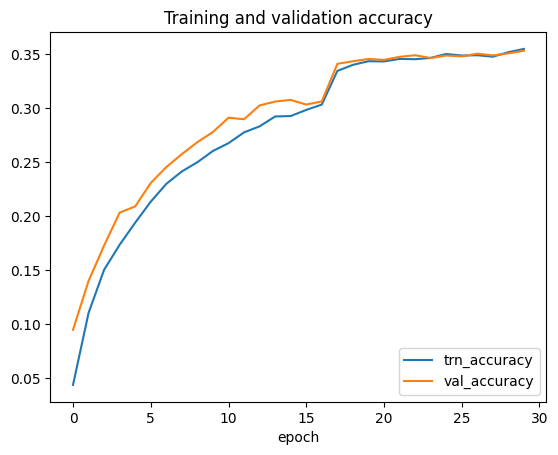

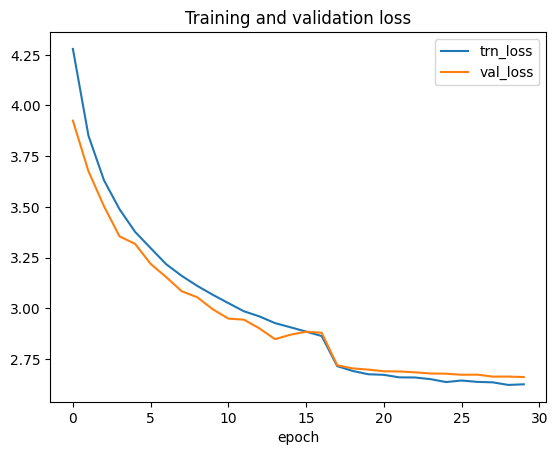

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

plt.figure

plt.title('Training and validation loss')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='upper right')
plt.show()

plt.show()

After some hyperparameters tuning such as l2 regularization, padding and less layers, the model stops to improve. So, the next choice will be add data to the dataset, what will be done using data augmentation.  

<br>




#### Data Augmentation

In [37]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),     # Randomly flip images horizontally
    layers.RandomRotation(0.10),         # Rotate images by 15% (0.15 * 360 degrees)
])

##### Model creation

In [44]:
model_after_augmentation = keras.Sequential([
  layers.Input(shape=(32, 32, 3)),
  data_augmentation,

  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(units=64, activation='relu'),
  layers.Dense(units=100, activation='softmax')
])

model_after_augmentation.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,580 (517.89 KB)

 Trainable params: 132,580 (517.89 KB)

 Non-trainable params: 0 (0.00 B)

##### Model compilation

In [45]:
model_after_augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### Defining callbacks

In [46]:
training_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss',
                                    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=3, min_lr = 0.0001)
    ]

##### Model training

In [47]:
history = model_after_augmentation.fit(X_train, y_train,
                                       epochs=100,
                                       validation_data=(X_val, y_val),
                                       callbacks=training_callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0346 - loss: 4.4174 - val_accuracy: 0.0938 - val_loss: 3.9125 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1028 - loss: 3.9035 - val_accuracy: 0.1304 - val_loss: 3.7518 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1378 - loss: 3.6873 - val_accuracy: 0.1742 - val_loss: 3.5010 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1638 - loss: 3.5432 - val_accuracy: 0.2065 - val_loss: 3.3339 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1812 - loss: 3.4519 - val_accuracy: 0.1937 - val_loss: 3.3937 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1971 - loss: 3.3938 - val_accuracy: 0.2333 - val_loss: 3.2135 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.

##### Numerical analysis

In [48]:
best_epoch = min(range(len(history.history['val_loss'])), key=lambda i: history.history['val_loss'][i])
print(f"Best epoch: {best_epoch+1}")
print(f"Train Loss: {history.history['loss'][best_epoch]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][best_epoch]:.4f}")
print(f"Train Accuracy: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best epoch: 78
Train Loss: 2.6893
Validation Loss: 2.5985
Train Accuracy: 0.3381
Validation Accuracy: 0.3580


##### Graphical analysis

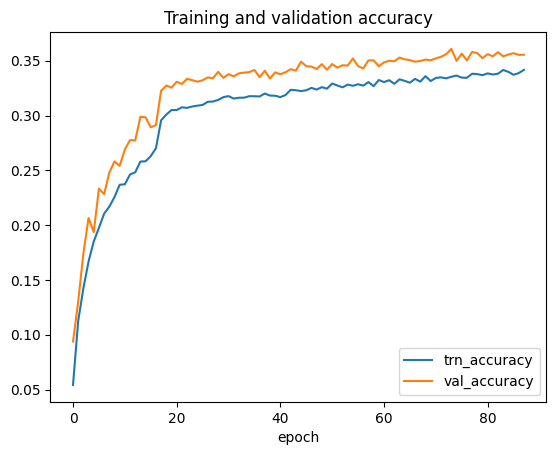

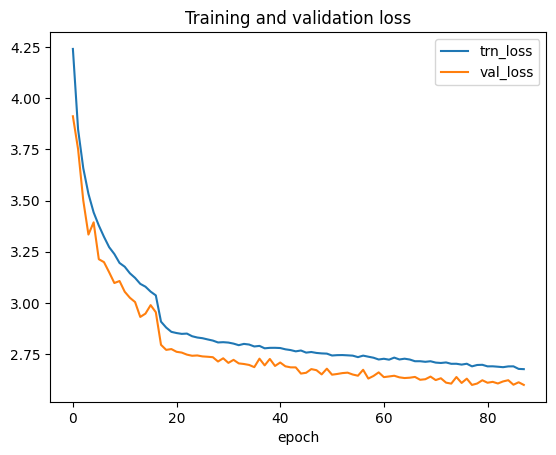

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

plt.figure

plt.title('Training and validation loss')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='upper right')
plt.show()

plt.show()

#### Conclusion  

Before data augmentation, the model achieved a validation loss of 2.6612 with a validation accuracy of 0.3534.  

After data augmentation, the model achieved a validation loss of 2.5985 with a validation accuracy of 0.3580.  

Although data augmentation led to a slight improvement, the overall performance remained poor. So, aditional improvements will be necessary.  

A natural choice would be to use CNN models such as VGG16 and ResNet through Transfer Learning.

